# GroupBy

In [32]:
import pandas as pd

In [33]:
dados = pd.read_csv("./Arquivos/aluguel_residencial.csv", sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


## Agrupando de acordo com os bairros

In [34]:
bairros = ['Copacabana', 'Centro', 'Tijuca', 'Botafogo', 'Cachambi', 'Jardim Botânico', 'Higienópolis	']
selecao = dados['Bairro'].isin(bairros)
selecao # Ele retorna uma series booleana

0         True
1         True
2         True
3        False
4         True
         ...  
21821    False
21822     True
21823    False
21824    False
21825    False
Name: Bairro, Length: 21826, dtype: bool

#### Para transformar essa serie em uma seleção do dataframe

In [35]:
dados = dados[selecao]
dados.head(6)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento


## Agrupando com Groupby
### Estudar groupby

In [36]:
grupo_bairro = dados.groupby('Bairro')

In [37]:
grupo_bairro.groups

{'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 2197, 2242, 2247, 2297, 2352, 2381, 2396, 2413, 2431, 2433, 2470, 2509, 2519, 2532, 2580, ...], 'Cachambi': [4, 56, 247, 252, 525, 629, 1389, 1683, 1862, 1949, 2087, 2178, 2556, 2633, 2889, 3009, 3045, 3080, 3755, 4060, 4161, 4195, 4204, 4398, 4446, 4635, 4638, 5272, 5280, 5292, 5308, 5455, 5523, 5572, 5749, 5862, 5919, 5987, 5996, 6173, 6176, 6239, 6378, 6386, 6485, 6600, 6771, 6832, 6850, 7315, 7423, 7441, 7625, 7737, 7907, 8014, 8046, 8066, 8200, 8217, 8600, 8685, 8896, 8904, 8944, 9119, 9123, 9232, 947

In [38]:
for bairro, dados in grupo_bairro:
    print(bairro)

Botafogo
Cachambi
Centro
Copacabana
Jardim Botânico
Tijuca


In [39]:
# Pra cada bairro, ele cria um dataFrame diferente
for bairro, dados in grupo_bairro:
    print(dados)

              Tipo    Bairro  Quartos  Vagas  Suites  Area   Valor  \
23     Apartamento  Botafogo        2      1       0    76  2500.0   
48     Apartamento  Botafogo        3      1       1   108  5950.0   
87     Apartamento  Botafogo        2      1       1    83  2800.0   
88     Apartamento  Botafogo        2      1       1    80  4300.0   
111    Apartamento  Botafogo        3      1       1   100  5500.0   
...            ...       ...      ...    ...     ...   ...     ...   
21660  Apartamento  Botafogo        2      0       0    60  1900.0   
21666  Apartamento  Botafogo        1      0       0    51  2000.0   
21715  Apartamento  Botafogo        2      1       1    52  3100.0   
21746  Apartamento  Botafogo        2      1       2    84  4230.0   
21790  Apartamento  Botafogo        3      2       1   100  4500.0   

       Condominio   IPTU  Valor por m² Tipo Agregado  
23          740.0    0.0         32.89   Apartamento  
48         1405.0  289.0         55.09   Apartame

### Imprimir a media para cada bairro

In [40]:
for bairro, data in grupo_bairro:
    print(bairro, data['Valor'].mean())

Botafogo 8791.828178694159
Cachambi 1157.1742424242425
Centro 1254.7521865889212
Copacabana 4126.677004538578
Jardim Botânico 8722.357414448668
Tijuca 2043.52


#### Forma mais facil ja que temos o agrupamento

In [41]:
grupo_bairro['Valor'].mean()

Bairro
Botafogo           8791.828179
Cachambi           1157.174242
Centro             1254.752187
Copacabana         4126.677005
Jardim Botânico    8722.357414
Tijuca             2043.520000
Name: Valor, dtype: float64

# Estatistica descritiva

In [42]:
grupo_bairro['Valor'].describe() #.round(2 para arredondar)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Botafogo,873.0,8791.828179,152202.407611,700.0,2200.0,3000.0,4350.0,4500000.0
Cachambi,132.0,1157.174242,351.491598,600.0,900.0,1100.0,1300.0,2800.0
Centro,343.0,1254.752187,884.671866,400.0,800.0,1000.0,1400.0,12000.0
Copacabana,2644.0,4126.677005,3611.409544,100.0,2000.0,3000.0,4800.0,35000.0
Jardim Botânico,263.0,8722.357414,9332.733769,1550.0,3150.0,4000.0,10000.0,50000.0
Tijuca,1100.0,2043.520000,1664.337667,750.0,1500.0,1800.0,2300.0,45000.0


#### Descrevendo apenas informações do meu interesse

In [43]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'mean']) # .rename(columns= {'min': 'Minimo'})

,min,max,mean
Bairro,,,
Botafogo,700.0,4500000.0,8791.828179
Cachambi,600.0,2800.0,1157.174242
Centro,400.0,12000.0,1254.752187
Copacabana,100.0,35000.0,4126.677005
Jardim Botânico,1550.0,50000.0,8722.357414
Tijuca,750.0,45000.0,2043.520000


### Vamos observar graficamente inconsistencia no desvio padrao

In [48]:
#%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Bairro'>

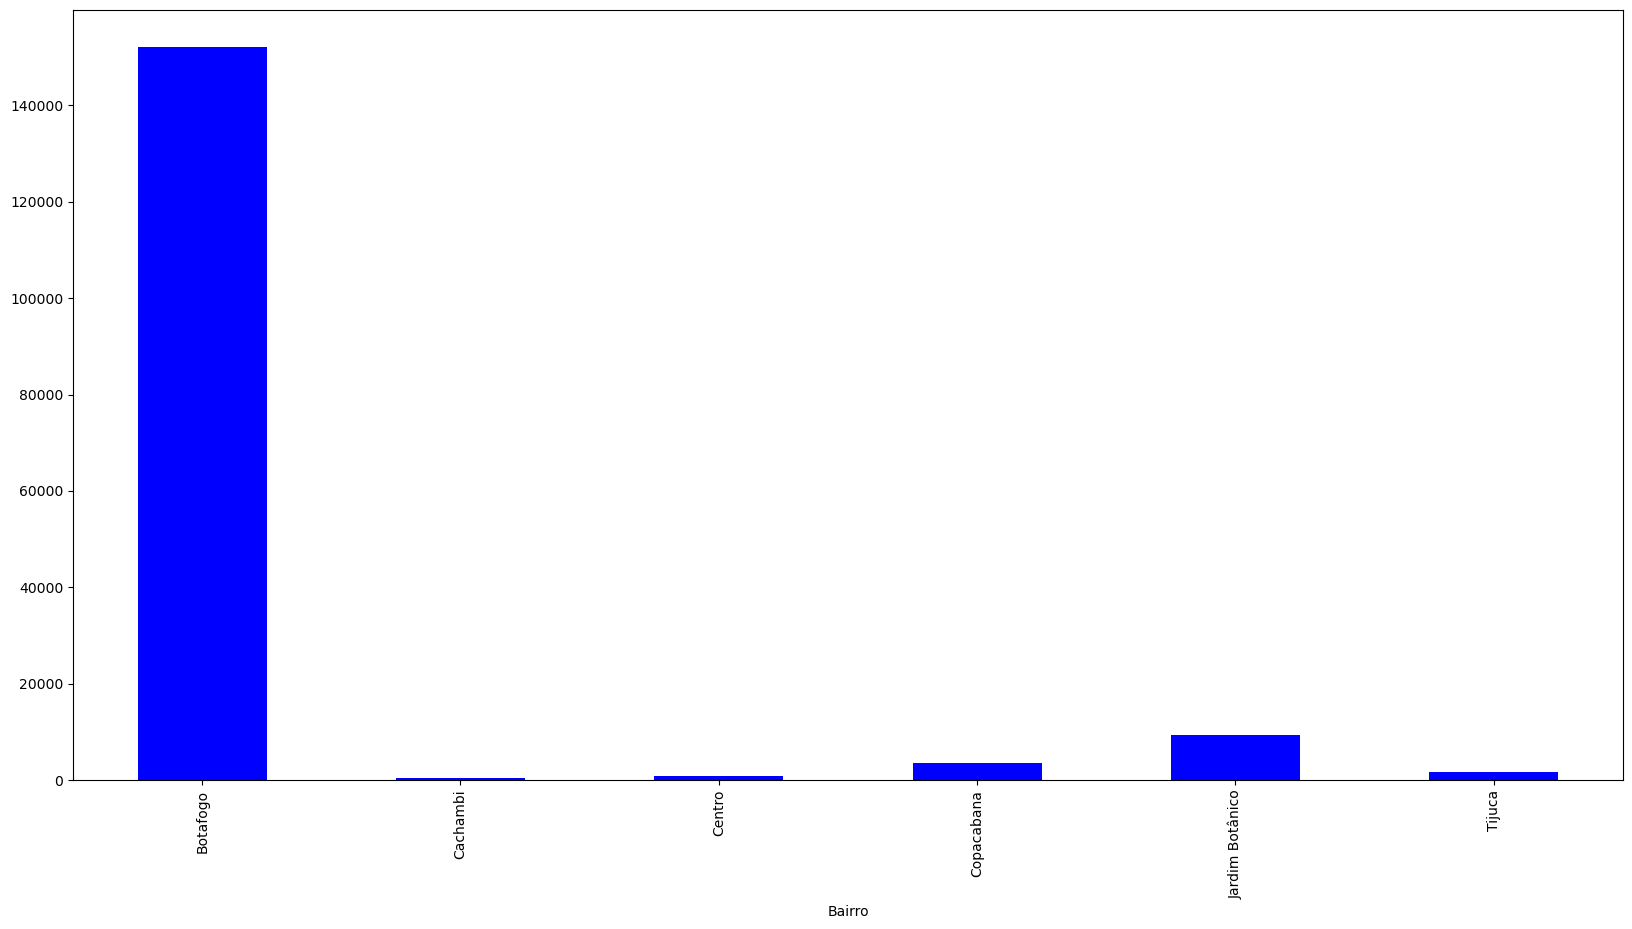

In [49]:
grupo_bairro['Valor'].std().plot.bar(color = 'blue')